In [7]:
# Load testing and training data. 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Load data from disk and split into training and validation sets.
data = np.loadtxt('data/credit-data.csv', dtype=np.int, delimiter=',', skiprows=1)
X, y = data[:, 1:-1], data[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
corr

[[ 20000      2      2 ...      0      0      0]
 [120000      2      2 ...   1000      0   2000]
 [ 90000      2      2 ...   1000   1000   5000]
 ...
 [ 30000      1      2 ...   4200   2000   3100]
 [ 80000      1      3 ...   1926  52964   1804]
 [ 50000      1      2 ...   1000   1000   1000]] [1 1 0 ... 1 1 1]


In [19]:
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier

learn = GradientBoostingClassifier()

class CreditModelGBC:
    def __init__(self):
        """
        Instantiates the model object, creating class variables if needed.
        """
        learn = GradientBoostingClassifier(n_estimators = 1000, learning_rate=1.0, max_depth=1, random_state=0)


    def fit(self, X_train, y_train):
        """
        Fits the model based on the given `X_train` and `y_train`.

        You should somehow manipulate and store this data to your model class
        so that you can make predictions on new testing data later on.
        """

        # TODO: Fit your model based on the given X and y.

        learn.fit(X_train, y_train)

    def predict(self, X_test):
        """
        Returns `y_hat`, a prediction for a given `X_test` after fitting.

        You should make use of the data that you stored/computed in the
        fitting phase to make your prediction on this new testing data.
        """

        # TODO: Predict on `X_test` based on what you learned in the fit phase.
        return learn.predict(X_test)
   


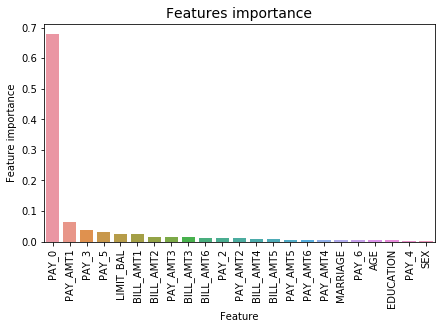

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

predictors = [  'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 
                'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 
                'BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


learn = GradientBoostingClassifier(n_estimators = 1000, learning_rate=1.0, max_depth=1, random_state=0)

learn.fit(X,y)

tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': learn.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

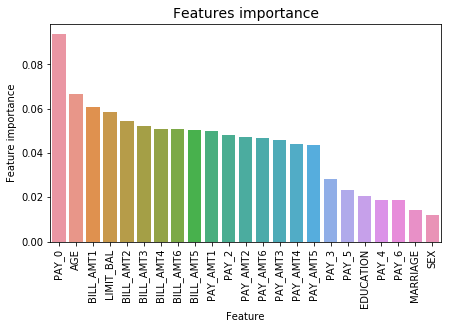

In [26]:
from sklearn.ensemble import RandomForestClassifier
learn2 = RandomForestClassifier(n_estimators = 100, random_state=0)

learn2.fit(X,y)

tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': learn2.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()  